In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#Opening the files as Pandas dataframes
df = pd.read_csv('../input/SMEMI309-final-evaluation-challenge-2020/AT4_train.csv')
no_label_data = pd.read_csv('../input/SMEMI309-final-evaluation-challenge-2020/AT4_test.csv') #no label

In [3]:
pd.DataFrame(df)

,label,onsc1,onsc2,onsc3,onsc4,onsc5,onsc6,onsc7,onsc8,onsc9,...,onsto1,onsto2,onsto3,onsto4,onsto5,onsto6,onsto7,onsto8,onsto9,onsto10
0,3,10,9,11,8,12,10,11,6,10,...,4,0,0,0,7,4,7,7,4,0
1,3,9,8,9,6,6,9,7,5,9,...,3,6,0,3,9,0,6,3,6,0
2,0,8,6,9,9,11,9,9,3,4,...,9,3,0,3,0,3,3,3,3,0
3,1,7,4,5,7,11,7,12,3,4,...,2,8,2,0,2,1,2,9,2,2
4,1,13,9,11,9,10,13,11,8,9,...,0,4,4,4,4,0,0,8,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1,10,9,10,9,10,10,10,7,8,...,0,0,0,0,0,0,0,0,9,0
1276,2,11,8,13,11,14,13,12,11,13,...,1,6,1,1,0,6,1,9,6,1
1277,1,8,7,9,9,8,8,8,6,6,...,0,0,4,0,0,4,4,8,8,4
1278,2,6,5,7,5,6,6,6,4,5,...,2,2,2,2,0,2,0,9,2,2


In [4]:
# Shape of the training and testing dataframes
print(df.shape)
print(no_label_data.shape)

(1280, 31)
(320, 30)


Split the dataframe's columns from the label column (targets):

In [5]:
# train and labels for AT4
columns_train = df.drop(['label'], axis=1).columns

df_X = pd.DataFrame(df, columns= columns_train)
df_y = pd.DataFrame(df, columns= ['label'])
df_y = np.ravel(df_y)

# for the last result
nl_data_X = pd.DataFrame(no_label_data)

In [6]:
# AT4_test
nl_data_X

,onsc1,onsc2,onsc3,onsc4,onsc5,onsc6,onsc7,onsc8,onsc9,onsc10,...,onsto1,onsto2,onsto3,onsto4,onsto5,onsto6,onsto7,onsto8,onsto9,onsto10
0,8,7,7,8,10,8,10,5,5,8,...,2,2,8,2,0,2,0,8,2,2
1,11,8,13,8,10,12,11,8,5,14,...,0,0,0,8,0,0,0,8,0,0
2,13,11,18,10,9,14,10,11,7,18,...,5,9,0,8,0,5,0,5,0,0
3,16,9,13,11,13,14,14,7,8,15,...,0,5,0,7,7,0,7,0,5,0
4,8,8,9,5,8,8,7,4,5,9,...,4,4,0,9,4,0,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,10,9,11,10,8,11,9,9,8,12,...,0,7,0,0,0,0,0,7,7,0
316,7,5,8,6,7,7,7,5,6,8,...,2,7,2,2,0,2,0,9,7,2
317,7,5,5,7,7,5,6,2,6,6,...,0,2,2,2,2,2,2,9,0,2
318,7,6,7,6,7,7,6,4,5,8,...,1,6,6,1,0,1,1,9,6,1


Splitting the initial dataframe AT4_train.csv into 4 sets : training columns (train_X), training labels (train_y), testing columns (test_X) and the testing labels (test_y) by giving the columns to use for training and labels, while dedicating 25% for the testing set. We will also shuffle the data before splitting it.

In [7]:
# Splitting into training and testing 
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size=0.25, shuffle=True)

Let's create the function prediction_model which we will use for fitting, getting the predictions and testing the accuracy of the different Classifiers of Scikit learn:

In [8]:
def prediction_model(model):
  global prediction_train
  global prediction

# Fitting the model
  model.fit(train_X, train_y)

# Predictions on the training set
  prediction_train = model.predict(train_X)

# Predictions on the testing set
  prediction = model.predict(test_X)

  print("Training accuracy: ", accuracy_score(train_y, prediction_train))
  print("Testing accuracy: ", accuracy_score(test_y, prediction))


------
**Decision tree Classifier:**

The varying parameter is the maximum depth of the tree

In [9]:
def dtc_model(max_depth):
  model_dtc = tree.DecisionTreeClassifier(max_depth=int(max_depth))
  prediction_model(model_dtc)

Maximum depth:  5
Training accuracy:  0.8927083333333333
Testing accuracy:  0.828125
Maximum depth:  7
Training accuracy:  0.95
Testing accuracy:  0.853125
Maximum depth:  10
Training accuracy:  0.9895833333333334
Testing accuracy:  0.85
Maximum depth:  15
Training accuracy:  1.0
Testing accuracy:  0.85625
Maximum depth:  20
Training accuracy:  1.0
Testing accuracy:  0.853125


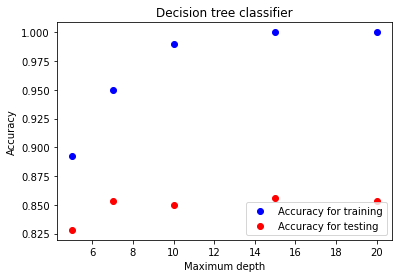

In [10]:
max_depth_table=[5,7,10,15,20]

acc_testing = []
acc_training = []

for i in max_depth_table:
  print("Maximum depth: ",i)
  dtc_model(i)
  acc_training.append(accuracy_score(train_y, prediction_train))
  acc_testing.append(accuracy_score(test_y, prediction))

# Plot accuracies for training and testing
plt.scatter(max_depth_table, acc_training, color='blue', label='Accuracy for training')
plt.scatter(max_depth_table, acc_testing, color='red', label='Accuracy for testing')
plt.title('Decision tree classifier')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This classifier doesn't seem to give very high accuracy in general, we will confirm this by comparing the next classifiers. We can also note that the more it trains, the lower the accuracy becomes, probably because of overfitting (we can see that the training accuracy reaches 100% very quickly).

-----
**AdaBoost Classifier**

The varying parameters for AdaBoost are maximum depth of the tree (max_depth, D on the plot) and the number of estimators (n_estimators, E on the plot)

In [11]:
def abc_model (max_depth, estimators):
  model = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=int(max_depth)), n_estimators=int(estimators))
  prediction_model(model)

Maximum depth:  5
Nb estimators:  5
Training accuracy:  0.934375
Testing accuracy:  0.821875
Maximum depth:  5
Nb estimators:  7
Training accuracy:  0.9625
Testing accuracy:  0.85625
Maximum depth:  5
Nb estimators:  10
Training accuracy:  0.98125
Testing accuracy:  0.85625
Maximum depth:  5
Nb estimators:  50
Training accuracy:  1.0
Testing accuracy:  0.928125
Maximum depth:  5
Nb estimators:  1000
Training accuracy:  1.0
Testing accuracy:  0.9375
Maximum depth:  7
Nb estimators:  5
Training accuracy:  1.0
Testing accuracy:  0.896875
Maximum depth:  7
Nb estimators:  7
Training accuracy:  1.0
Testing accuracy:  0.890625
Maximum depth:  7
Nb estimators:  10
Training accuracy:  1.0
Testing accuracy:  0.896875
Maximum depth:  7
Nb estimators:  50
Training accuracy:  1.0
Testing accuracy:  0.90625
Maximum depth:  7
Nb estimators:  1000
Training accuracy:  1.0
Testing accuracy:  0.9375
Maximum depth:  10
Nb estimators:  5
Training accuracy:  1.0
Testing accuracy:  0.89375
Maximum depth:  1

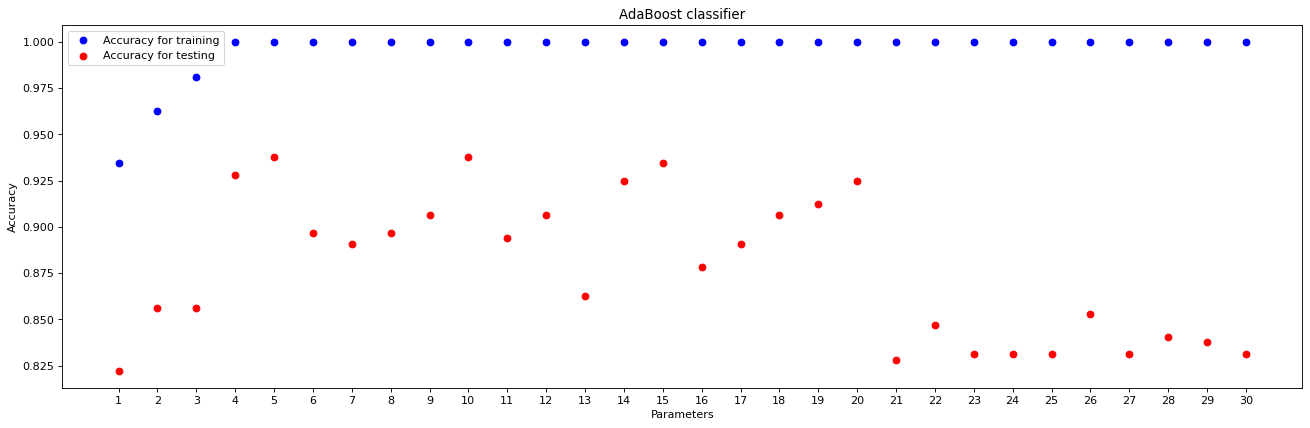

['1) D5 - E5', '2) D5 - E7', '3) D5 - E10', '4) D5 - E50', '5) D5 - E1000', '6) D7 - E5', '7) D7 - E7', '8) D7 - E10', '9) D7 - E50', '10) D7 - E1000', '11) D10 - E5', '12) D10 - E7', '13) D10 - E10', '14) D10 - E50', '15) D10 - E1000', '16) D11 - E5', '17) D11 - E7', '18) D11 - E10', '19) D11 - E50', '20) D11 - E1000', '21) D50 - E5', '22) D50 - E7', '23) D50 - E10', '24) D50 - E50', '25) D50 - E1000', '26) D100 - E5', '27) D100 - E7', '28) D100 - E10', '29) D100 - E50', '30) D100 - E1000']


In [12]:
max_depth_table = [5,7,10,11,50,100]
estimators_table = [5,7,10,50,1000]

#Axis that will contain all values of the tables
axis_table_1=[]
n=0
for i in range(len(max_depth_table)):
  for j in range(len(estimators_table)):
    n+=1
    axis_table_1.append(str(n))

axis_table_2=[]
it=''
for i in range(len(max_depth_table)):
  for j in range(len(estimators_table)):
    it="D"+str(max_depth_table[i])+" - E"+str(estimators_table[j])
    axis_table_2.append(it)
        
axis_table=[]
for l in range(len(axis_table_1)):
    axis_table.append(axis_table_1[l]+") "+axis_table_2[l])    
    
#Applying the model
acc_testing = []
acc_training = []

for i in max_depth_table:
  for j in estimators_table:
    print("Maximum depth: ",i)
    print("Nb estimators: ",j)
    abc_model(i,j)
    acc_training.append(accuracy_score(train_y, prediction_train))  
    acc_testing.append(accuracy_score(test_y, prediction))

# Plot accuracies for training and testing
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(axis_table_1, acc_training,color='blue', label='Accuracy for training')
plt.scatter(axis_table_1, acc_testing,color='red', label='Accuracy for testing')
plt.title('AdaBoost classifier')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(axis_table)

For AdaBoost, accuracy scores seem to be high for certain parameters. We can note a high score for high number of estimators and a lower to medium maximum depth. During the submission, the number of estimators in the range 10-1000 did not give a higher accuracy, even though on this plot, the accuracy clearly increased between 10 and 1000. For the maximum depth, the difference is not very different for 7 or 10. But once we increase max_depth above 10, we see a big drop in the accuracy score, probably due to overtraining.


------
**Bagging Classifier**

The varying parameters are the maximum depth of the tree and the number of estimators

In [13]:
from sklearn.ensemble import BaggingClassifier

def bc_model (max_depth, estimators):
  model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth= int(max_depth)), n_estimators= int(estimators))
  prediction_model(model)

Maximum depth:  2
Nb estimators:  2
Training accuracy:  0.6520833333333333
Testing accuracy:  0.615625
Maximum depth:  2
Nb estimators:  5
Training accuracy:  0.7104166666666667
Testing accuracy:  0.66875
Maximum depth:  2
Nb estimators:  10
Training accuracy:  0.6510416666666666
Testing accuracy:  0.634375
Maximum depth:  2
Nb estimators:  100
Training accuracy:  0.678125
Testing accuracy:  0.653125
Maximum depth:  5
Nb estimators:  2
Training accuracy:  0.8625
Testing accuracy:  0.784375
Maximum depth:  5
Nb estimators:  5
Training accuracy:  0.890625
Testing accuracy:  0.846875
Maximum depth:  5
Nb estimators:  10
Training accuracy:  0.9354166666666667
Testing accuracy:  0.85
Maximum depth:  5
Nb estimators:  100
Training accuracy:  0.9364583333333333
Testing accuracy:  0.871875
Maximum depth:  10
Nb estimators:  2
Training accuracy:  0.9364583333333333
Testing accuracy:  0.846875
Maximum depth:  10
Nb estimators:  5
Training accuracy:  0.984375
Testing accuracy:  0.890625
Maximum d

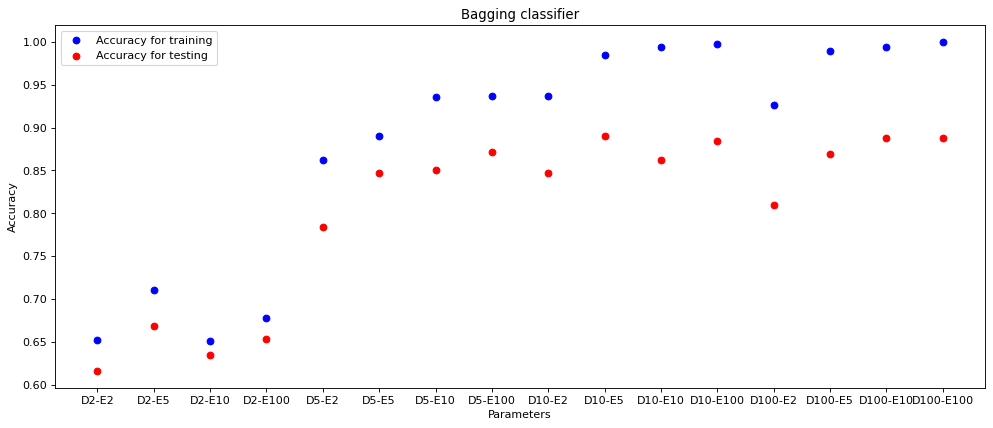

['D2-E2', 'D2-E5', 'D2-E10', 'D2-E100', 'D5-E2', 'D5-E5', 'D5-E10', 'D5-E100', 'D10-E2', 'D10-E5', 'D10-E10', 'D10-E100', 'D100-E2', 'D100-E5', 'D100-E10', 'D100-E100']


In [14]:
max_depth_table = [2,5,10,100]
estimators_table = [2,5,10,100]

axis_table=[]
it=''
for i in range(len(max_depth_table)):
  for j in range(len(estimators_table)):
    it="D"+str(max_depth_table[i])+"-E"+str(estimators_table[j])
    axis_table.append(it)

acc_testing = []
acc_training = []

for i in max_depth_table:
  for j in estimators_table:
    print("Maximum depth: ",i)
    print("Nb estimators: ",j)
    bc_model(i,j)
    acc_training.append(accuracy_score(train_y, prediction_train))  
    acc_testing.append(accuracy_score(test_y, prediction))

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(axis_table, acc_training, color='blue', label='Accuracy for training')
plt.scatter(axis_table, acc_testing,color='red', label='Accuracy for testing')
plt.title('Bagging classifier')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(axis_table)

With those parameters, we can understand the performance of the Bagging classifier. The depth seems like it has to be 5 or higher to get a decent score. Even with max_depth=100, we get close results to max_depth=5 probably because the tree was already at its maximum depth. Then, we notice the ideal value for the number of estimators is, the same way as for the maximum depth, starting to get interesting at number 5 and higher.
In comparison with AdaBoost, we could not get an accuracy past 90%, so in theory the prediction on the submission accuracy should also be lower.

-----
**KNeighbors Classifier**

The varying parameter is the number of neighbors

In [15]:
def kn_model(neighbors):
  model = KNeighborsClassifier(n_neighbors=neighbors )
  prediction_model(model)

Number of neighbors:  2
Training accuracy:  0.9739583333333334
Testing accuracy:  0.915625
Number of neighbors:  3
Training accuracy:  0.9635416666666666
Testing accuracy:  0.921875
Number of neighbors:  4
Training accuracy:  0.9479166666666666
Testing accuracy:  0.9125
Number of neighbors:  5
Training accuracy:  0.9458333333333333
Testing accuracy:  0.9125
Number of neighbors:  6
Training accuracy:  0.94375
Testing accuracy:  0.9125
Number of neighbors:  7
Training accuracy:  0.9375
Testing accuracy:  0.9125
Number of neighbors:  8
Training accuracy:  0.934375
Testing accuracy:  0.915625


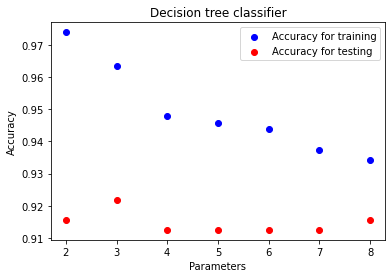

In [16]:
neighbors_table=[2,3,4,5,6,7,8]

acc_testing = []
acc_training = []


for i in neighbors_table:
  print("Number of neighbors: ",i)
  kn_model(i)
  acc_training.append(accuracy_score(train_y, prediction_train))
  acc_testing.append(accuracy_score(test_y, prediction))


plt.scatter(neighbors_table, acc_training, color='blue', label='Accuracy for training')
plt.scatter(neighbors_table, acc_testing, color='red', label='Accuracy for testing')
plt.title('Decision tree classifier')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This model, even though we only modified one parameter, gets decent accuracy score for 5 neighbors at 92.5% comparing to bagging which could not surpass 90%. Until now, this is one of the best accuracies.

-------
**Multi Layer Perceptron (with logistic and relu)**

As an activation function, logistic and linear regression were tested (A). The varying parameters are the alpha (a) which is the learning rate, and the batch size (B) which is the number of instances the model is going to use for training in each batch. 




In [17]:
from sklearn.neural_network import MLPClassifier

def mlp_model(activation_type,alpha,batch_size):
  global model
  model = MLPClassifier(activation=activation_type, alpha=alpha, batch_size=batch_size, learning_rate_init=0.001, random_state=1,  max_iter=10)
  prediction_model(model)

Activation:  relu
alpha:  0.1
batch_size:  100
Training accuracy:  0.8854166666666666
Testing accuracy:  0.8375
Activation:  relu
alpha:  0.1
batch_size:  25


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9364583333333333
Testing accuracy:  0.8875
Activation:  relu
alpha:  0.1
batch_size:  5


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9447916666666667
Testing accuracy:  0.915625
Activation:  relu
alpha:  0.1
batch_size:  1


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.8510416666666667
Testing accuracy:  0.81875
Activation:  relu
alpha:  0.001
batch_size:  100
Training accuracy:  0.884375
Testing accuracy:  0.834375
Activation:  relu
alpha:  0.001
batch_size:  25


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9364583333333333
Testing accuracy:  0.8875
Activation:  relu
alpha:  0.001
batch_size:  5


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9541666666666667
Testing accuracy:  0.88125
Activation:  relu
alpha:  0.001
batch_size:  1


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.940625
Testing accuracy:  0.91875
Activation:  relu
alpha:  0.0001
batch_size:  100
Training accuracy:  0.8854166666666666
Testing accuracy:  0.834375
Activation:  relu
alpha:  0.0001
batch_size:  25


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.934375
Testing accuracy:  0.884375
Activation:  relu
alpha:  0.0001
batch_size:  5


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.959375
Testing accuracy:  0.896875
Activation:  relu
alpha:  0.0001
batch_size:  1


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9489583333333333
Testing accuracy:  0.921875
Activation:  relu
alpha:  1e-06
batch_size:  100
Training accuracy:  0.8854166666666666
Testing accuracy:  0.8375
Activation:  relu
alpha:  1e-06
batch_size:  25


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9375
Testing accuracy:  0.890625
Activation:  relu
alpha:  1e-06
batch_size:  5


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9635416666666666
Testing accuracy:  0.9125
Activation:  relu
alpha:  1e-06
batch_size:  1


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9416666666666667
Testing accuracy:  0.928125
Activation:  logistic
alpha:  0.1
batch_size:  100
Training accuracy:  0.8697916666666666
Testing accuracy:  0.85625
Activation:  logistic
alpha:  0.1
batch_size:  25


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9197916666666667
Testing accuracy:  0.8875
Activation:  logistic
alpha:  0.1
batch_size:  5


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9104166666666667
Testing accuracy:  0.89375
Activation:  logistic
alpha:  0.1
batch_size:  1


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.778125
Testing accuracy:  0.753125
Activation:  logistic
alpha:  0.001
batch_size:  100
Training accuracy:  0.8677083333333333
Testing accuracy:  0.85625
Activation:  logistic
alpha:  0.001
batch_size:  25


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9229166666666667
Testing accuracy:  0.890625
Activation:  logistic
alpha:  0.001
batch_size:  5


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9260416666666667
Testing accuracy:  0.9
Activation:  logistic
alpha:  0.001
batch_size:  1


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9114583333333334
Testing accuracy:  0.88125
Activation:  logistic
alpha:  0.0001
batch_size:  100
Training accuracy:  0.8677083333333333
Testing accuracy:  0.85625
Activation:  logistic
alpha:  0.0001
batch_size:  25


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9229166666666667
Testing accuracy:  0.890625
Activation:  logistic
alpha:  0.0001
batch_size:  5


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9270833333333334
Testing accuracy:  0.896875
Activation:  logistic
alpha:  0.0001
batch_size:  1


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.921875
Testing accuracy:  0.890625
Activation:  logistic
alpha:  1e-06
batch_size:  100
Training accuracy:  0.8677083333333333
Testing accuracy:  0.85625
Activation:  logistic
alpha:  1e-06
batch_size:  25


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9229166666666667
Testing accuracy:  0.890625
Activation:  logistic
alpha:  1e-06
batch_size:  5


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.9270833333333334
Testing accuracy:  0.896875
Activation:  logistic
alpha:  1e-06
batch_size:  1


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training accuracy:  0.921875
Testing accuracy:  0.896875


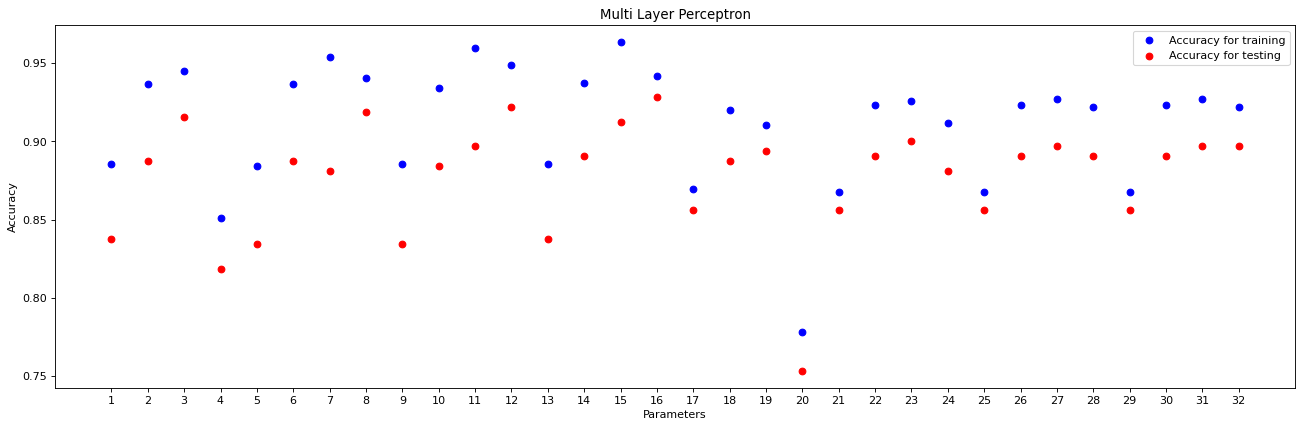

['1) A:relu-a:0.1-B:100', '2) A:relu-a:0.1-B:25', '3) A:relu-a:0.1-B:5', '4) A:relu-a:0.1-B:1', '5) A:relu-a:0.001-B:100', '6) A:relu-a:0.001-B:25', '7) A:relu-a:0.001-B:5', '8) A:relu-a:0.001-B:1', '9) A:relu-a:0.0001-B:100', '10) A:relu-a:0.0001-B:25', '11) A:relu-a:0.0001-B:5', '12) A:relu-a:0.0001-B:1', '13) A:relu-a:1e-06-B:100', '14) A:relu-a:1e-06-B:25', '15) A:relu-a:1e-06-B:5', '16) A:relu-a:1e-06-B:1', '17) A:logistic-a:0.1-B:100', '18) A:logistic-a:0.1-B:25', '19) A:logistic-a:0.1-B:5', '20) A:logistic-a:0.1-B:1', '21) A:logistic-a:0.001-B:100', '22) A:logistic-a:0.001-B:25', '23) A:logistic-a:0.001-B:5', '24) A:logistic-a:0.001-B:1', '25) A:logistic-a:0.0001-B:100', '26) A:logistic-a:0.0001-B:25', '27) A:logistic-a:0.0001-B:5', '28) A:logistic-a:0.0001-B:1', '29) A:logistic-a:1e-06-B:100', '30) A:logistic-a:1e-06-B:25', '31) A:logistic-a:1e-06-B:5', '32) A:logistic-a:1e-06-B:1']


In [18]:
activation_type=['relu','logistic']
alpha=[0.1,0.001,0.0001,0.000001]
batch_size=[100,25,5,1]

axis_table_1=[]
n=0
for i in range(len(activation_type)):
  for j in range(len(alpha)):
    for k in range(len(batch_size)):
      n+=1
      axis_table_1.append(str(n))

axis_table_2=[]
it=''
for i in range(len(activation_type)):
  for j in range(len(alpha)):
    for k in range(len(batch_size)):
      it="A:"+str(activation_type[i])+"-a:"+str(alpha[j])+"-B:"+str(batch_size[k])
      axis_table_2.append(it)
        
axis_table=[]
for l in range(len(axis_table_1)):
    axis_table.append(axis_table_1[l]+") "+axis_table_2[l])
    

acc_testing = []
acc_training = []

for i in activation_type:
  for j in alpha:
    for k in batch_size:
      print("Activation: ",i)
      print("alpha: ",j)
      print("batch_size: ",k)
      mlp_model(i,j,k)
      acc_training.append(model.score(train_X, train_y))  
      acc_testing.append(model.score(test_X, test_y))

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(axis_table_1, acc_training, color='blue', label='Accuracy for training')
plt.scatter(axis_table_1, acc_testing, color='red', label='Accuracy for testing')
plt.title('Multi Layer Perceptron')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(axis_table)

I wanted to add some kind of classifier using neural networks and came accross this multi layer perceptron classifier with Scikit-learn. The parameters that we could vary were interesting: the activation function, the initial learning rate, the learning rate, the batch_size. Which would allow us to add neural networks to this list of classifiers without a deep learning algorithm.

First thing we see in the plot is that the linear regression activation function is slightly more effective than the logistic regression and gets higher accuracy scores, unless the batch size is 1. The highest accuracy was obtained with the lowest alpha rate 0.000001 and a low batch size of 1. Of course, if we choose the smallest value of alpha and batch size, the algorithm will maybe go into overtraining so I tried to add some extreme parameters. 
Moreover, usually such parameters would lead to overtraining but in our case they were very effective in predicting correctly. In the submission, this classifier got my highest score (97.5%) with parameters activation='logistic', alpha=0.0001, batch_size=5.

------
**Random Forest**

The varying parameters are the number of estimators which are the number of trees in the forest and max_depth which is the maximum depth of the tree.

In [19]:
def rfc_model(max_depth,estimators):
  model = RandomForestClassifier(n_estimators=int(estimators),criterion="entropy", max_depth=int(max_depth) )
  prediction_model(model)

Maximum depth:  2
Nb estimators:  2
Training accuracy:  0.7760416666666666
Testing accuracy:  0.74375
Maximum depth:  2
Nb estimators:  5
Training accuracy:  0.75
Testing accuracy:  0.740625
Maximum depth:  2
Nb estimators:  10
Training accuracy:  0.7333333333333333
Testing accuracy:  0.703125
Maximum depth:  2
Nb estimators:  20
Training accuracy:  0.8041666666666667
Testing accuracy:  0.775
Maximum depth:  2
Nb estimators:  1000
Training accuracy:  0.8645833333333334
Testing accuracy:  0.821875
Maximum depth:  5
Nb estimators:  2
Training accuracy:  0.8625
Testing accuracy:  0.76875
Maximum depth:  5
Nb estimators:  5
Training accuracy:  0.9052083333333333
Testing accuracy:  0.840625
Maximum depth:  5
Nb estimators:  10
Training accuracy:  0.9364583333333333
Testing accuracy:  0.865625
Maximum depth:  5
Nb estimators:  20
Training accuracy:  0.9447916666666667
Testing accuracy:  0.896875
Maximum depth:  5
Nb estimators:  1000
Training accuracy:  0.95625
Testing accuracy:  0.909375
Ma

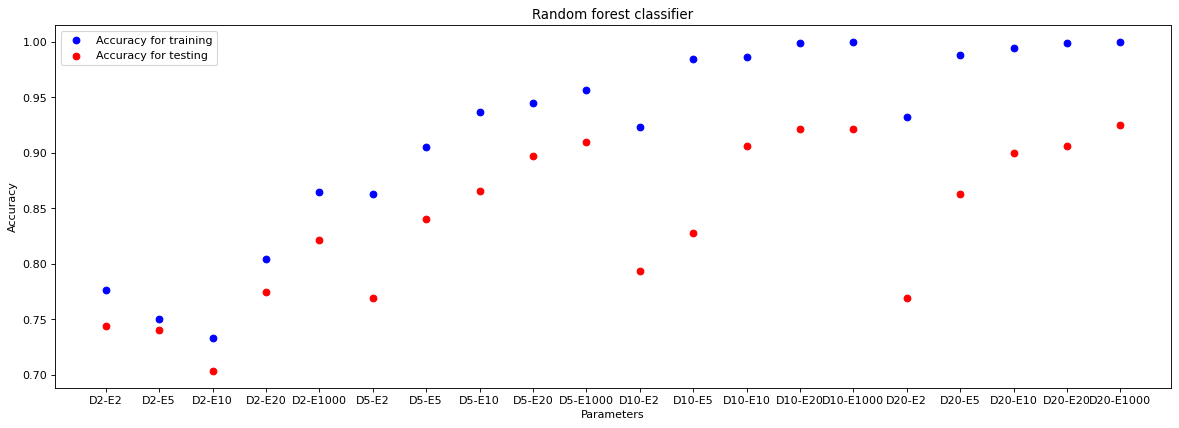

['D2-E2', 'D2-E5', 'D2-E10', 'D2-E20', 'D2-E1000', 'D5-E2', 'D5-E5', 'D5-E10', 'D5-E20', 'D5-E1000', 'D10-E2', 'D10-E5', 'D10-E10', 'D10-E20', 'D10-E1000', 'D20-E2', 'D20-E5', 'D20-E10', 'D20-E20', 'D20-E1000']


In [20]:
max_depth_table = [2,5,10,20]
estimators_table = [2,5,10,20,1000]

axis_table=[]
it=''
for i in range(len(max_depth_table)):
  for j in range(len(estimators_table)):
    it="D"+str(max_depth_table[i])+"-E"+str(estimators_table[j])
    axis_table.append(it)

acc_testing = []
acc_training = []

for i in max_depth_table:
  for j in estimators_table:
    print("Maximum depth: ",i)
    print("Nb estimators: ",j)
    rfc_model(i,j)
    acc_training.append(accuracy_score(train_y, prediction_train))  
    acc_testing.append(accuracy_score(test_y, prediction))

figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(axis_table, acc_training, color='blue', label='Accuracy for training')
plt.scatter(axis_table, acc_testing, color='red', label='Accuracy for testing')
plt.title('Random forest classifier')
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(axis_table)

At first sight, Random forest seemed to be on the top 3 classifiers we tested so far. The submission for the parameters max_depth=10 and n_estimators=10000 only gave fair results at 87%. On the second try with Random Forest, I got 95%.

------
**INTERACTING WITH THE SUBMISSIONS TO CHOOSE THE BEST CLASSIFIER**


- **First submission** was done with Random forest, max_depth=5 and n_estimators=10 only gave fair results at 87%. Seeing the results of some other students, there was definitely room for a higher score.
- **Second and third submissions** were done with AdaBoost classifier which started to give better accuracy score from 92.5% to 93.5% after training the model a little more with changed parameters. 
- **Fourth submission** with KNeighbors did not get a higher score than AdaBoost, even with the best parameter with 5 neighbors. So for the **5th submission**, I tried again to train the model by increasing the parameters for AdaBoost and got the highest accuracy so far at 96%. Seeing that the  score increased, I gave more extreme values to try to increase it further than 96%, but it did not change at the **6th submission**.
- After getting 96% accuracy on the submission of AdaBoost and could not get higher on this classifier, I decided to try other classifiers like Random Forest, with higher training parameters this time max_depth=10 and n_estimators=1000 which gave 95% accuracy (**7th submission**)
- For the **8th submission**, MLP was used with A='relu',alpha=0.001 and batch_size=25 but only got me 95% accuracy again.
- At this point, I selected AdaBoost as the best classifiers for classifying AT4 data, since none could surpass it.
- At the end, I changed MLP again with more extreme values by decreasing the alpha and the batch size to 0.000001 and 1 respectively and got the most accurate results at 97.5% accuracy on **9th submission**.

----------------
Choosing the model and the best parameters giving the highest accuracy to generate the prediction file

In [21]:
# Creating a new model model_1 for submission:
#model_1 = RandomForestClassifier(n_estimators=10000,criterion="entropy", max_depth=10)
model_1 = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=5), n_estimators=1000)
#model_1 = KNeighborsClassifier(n_neighbors=5)
#model_1 = MLPClassifier(activation='relu', alpha=0.000001, batch_size=5, learning_rate_init=0.001, random_state=1,  max_iter=10)
#model_1 = MLPClassifier(activation='logistic', alpha=0.0001, batch_size=5, learning_rate_init=0.001, random_state=1,  max_iter=10)

# Fitting model_1 
model_1.fit(train_X, train_y)
predictions_model_1 = model_1.predict(nl_data_X)
print(predictions_model_1)

# Creating a pandas Dataframe with the correct form for submission
entry=[]
for i in range(len(prediction)):
  entry.append([i,predictions_model_1[i]])

new_df = pd.DataFrame(entry, columns = ["id","label"])
new_df.to_csv('new_df.csv', index=False)

print(new_df)

[2 0 0 3 3 1 2 3 0 1 2 0 1 2 0 0 3 0 2 0 2 3 3 3 3 3 1 2 0 3 0 0 0 2 2 1 0
 0 0 1 2 1 0 0 3 2 0 1 3 2 1 0 0 0 3 0 2 3 1 2 1 1 2 2 3 0 2 2 1 1 2 3 3 1
 2 2 1 3 2 1 3 3 3 2 1 3 1 3 3 2 1 1 1 3 2 2 2 3 3 3 3 1 2 0 1 1 3 2 2 1 3
 0 1 0 3 0 3 1 3 3 3 3 3 0 1 3 2 0 0 3 3 2 1 1 2 1 3 1 2 2 2 3 1 0 0 0 1 1
 2 0 1 2 2 0 1 3 0 1 1 3 3 3 1 0 1 3 1 1 1 1 2 0 1 1 3 0 0 2 0 2 2 3 1 1 2
 0 1 2 0 2 2 1 2 3 1 2 1 1 1 0 1 2 0 3 2 3 0 0 3 0 2 0 3 3 2 0 1 2 1 3 0 1
 0 2 2 0 1 3 2 3 0 3 2 2 2 1 1 0 3 3 0 0 0 1 3 0 1 1 2 2 2 1 1 2 2 1 2 2 1
 2 0 0 1 1 1 0 3 1 0 1 1 3 0 3 1 3 2 3 3 0 0 0 1 0 3 0 3 1 2 0 0 0 2 3 1 1
 0 2 1 0 1 1 1 0 2 3 2 0 3 1 3 1 3 2 1 1 2 3 2 0]
      id  label
0      0      2
1      1      0
2      2      0
3      3      3
4      4      3
..   ...    ...
315  315      1
316  316      2
317  317      3
318  318      2
319  319      0

[320 rows x 2 columns]
